In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

/var/folders/0n/swn__wf94qd3zdch1tvp087r0000gn/T/ipykernel_96405/2305804614.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  cube = pd.read_csv(in_fp.glob(f'SSA*{name}*.csv').__next__(), comment = '#', names = ['Sample_signal(mV)','Reflectance', 'Specific_surface_area(SSA)', 'top_height', 'Comments'], index_col = False)


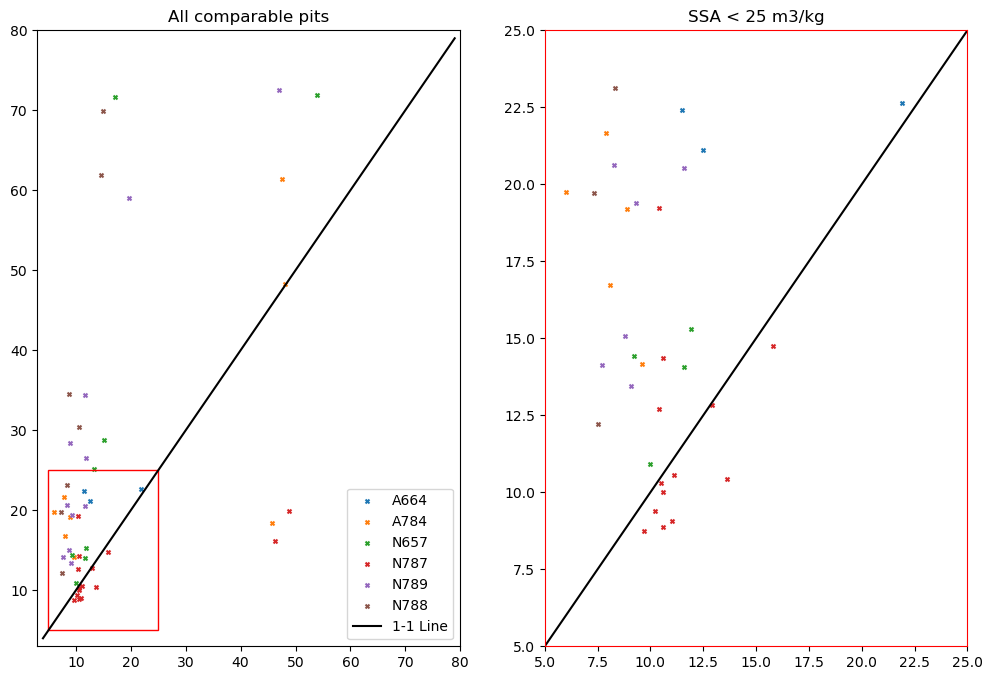

In [34]:
fig, axes = plt.subplots(1, 2 ,figsize = (12,8))

in_fp = Path('/Users/zachkeskinen/Documents/smp/data/ICECUBE/')
pit_names = ['A664', 'A784', 'N657', 'N787', 'N789', 'N788']

cubes = []
smps = []

for name in pit_names:
    smp = pd.read_csv(in_fp.glob(f'{name}.csv').__next__(), index_col = 0)
    smp.index = smp.index/ 10
    smp.index = smp.index[-1] - smp.index
    
    cube = pd.read_csv(in_fp.glob(f'SSA*{name}*.csv').__next__(), comment = '#', names = ['Sample_signal(mV)','Reflectance', 'Specific_surface_area(SSA)', 'top_height', 'Comments'], index_col = False)
    for i, r in cube.iterrows():
        if i == 0:
            top = r['top_height']
            continue

        smp_layer_ssa = smp.loc[slice(top, r.top_height)]['CR2020_ssa [m^2/kg]'].mean()
        top = r['top_height']

        cube.loc[i - 1, 'smp_ssa'] = smp_layer_ssa

        if i == len(cube) - 1:
            smp_layer_ssa = smp.loc[slice(r.top_height, 0)]['CR2020_ssa [m^2/kg]'].mean()
            cube.loc[i, 'smp_ssa'] = smp_layer_ssa
    for ax in axes:
        ax.scatter(cube['Specific_surface_area(SSA)'], cube['smp_ssa'], marker = 'x', s = 8, label = name)

for ax in axes:
    ax.plot([4, 79], [4, 79], label = '1-1 Line', color = 'black')


# Create a Rectangle patch
rect = patches.Rectangle((5, 5), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
axes[0].add_patch(rect)

for side in ['bottom','top','right','left']:
    axes[1].spines[side].set_color('red')

axes[0].legend()
axes[0].set_xlim(3, 80)
axes[0].set_ylim(3, 80)
axes[1].set_xlim(5, 25)
axes[1].set_ylim(5, 25)

axes[0].set_title('All comparable pits')
axes[1].set_title('SSA < 25 m3/kg')

plt.savefig('/Users/zachkeskinen/Documents/smp/figures/march_8_9_icecube_smp_scatter.png')

In [70]:
ax_i%axes.shape[1]

0

In [69]:
axes.shape[1]

6

/var/folders/0n/swn__wf94qd3zdch1tvp087r0000gn/T/ipykernel_96405/1804122442.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  cube = pd.read_csv(in_fp.glob(f'SSA*{name}*.csv').__next__(), comment = '#', names = ['Sample_signal(mV)','Reflectance', 'Specific_surface_area(SSA)', 'top_height', 'Comments'], index_col = False)
/var/folders/0n/swn__wf94qd3zdch1tvp087r0000gn/T/ipykernel_96405/1804122442.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  cube = pd.read_csv(in_fp.glob(f'SSA*{name}*.csv').__next__(), comment = '#', names = ['Sample_signal(mV)','Reflectance', 'Specific_surface_area(SSA)', 'top_height', 'Comments'], index_col = False)
/var/folders/0n/swn__wf94qd3zdch1tvp087r0000gn/T/ipykernel_96405/1804122442.py:17: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with i

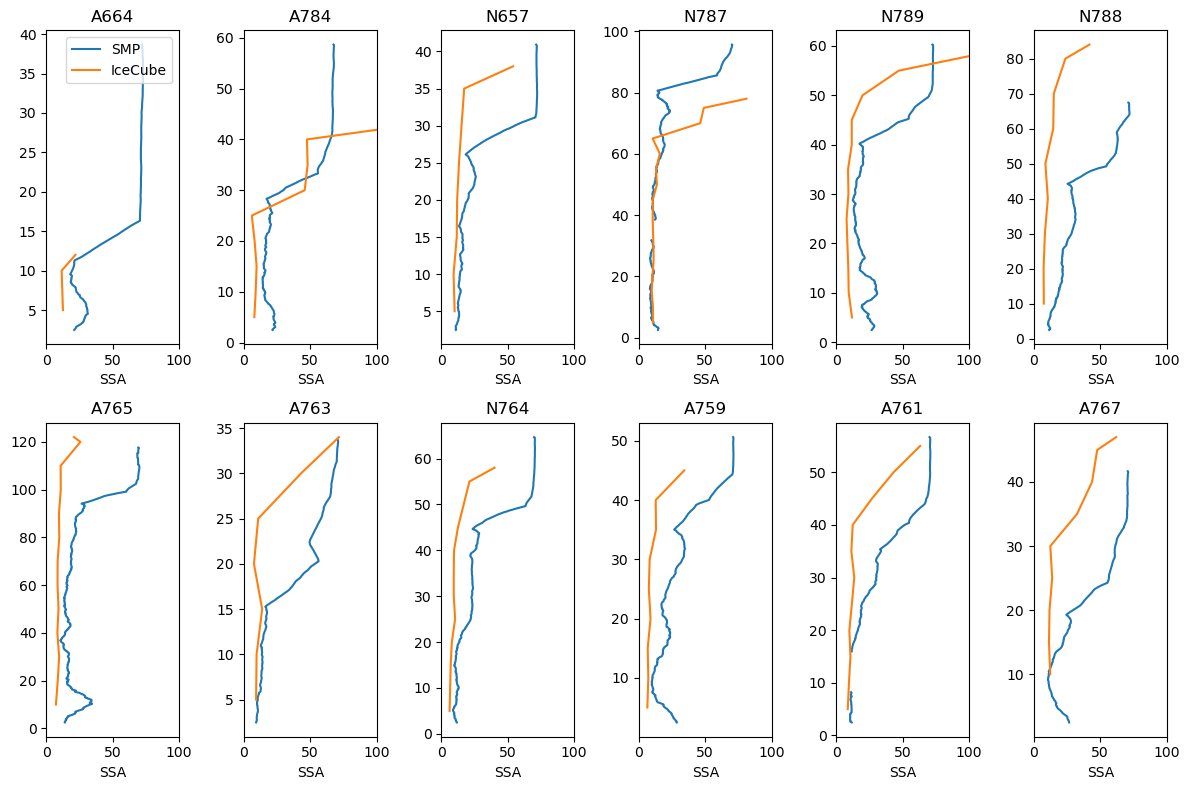

In [72]:
from pandas.errors import ParserError
import math

in_fp = Path('/Users/zachkeskinen/Documents/smp/data/ICECUBE/')
pit_names = ['A664', 'A784', 'N657', 'N787', 'N789', 'N788', 'A765','A763','N764','A759','A761', 'A767'] #'A766' 'N762'

cubes = []
smps = []

fig, axes = plt.subplots(2, math.ceil(len(pit_names)/2), figsize = (12, 8))

for ax_i, name in enumerate(pit_names):
    smp = pd.read_csv(in_fp.glob(f'{name}.csv').__next__(), index_col = 0)
    smp.index = smp.index/ 10
    smp.index = smp.index[-1] - smp.index
    
    cube = pd.read_csv(in_fp.glob(f'SSA*{name}*.csv').__next__(), comment = '#', names = ['Sample_signal(mV)','Reflectance', 'Specific_surface_area(SSA)', 'top_height', 'Comments'], index_col = False)
    for i, r in cube.iterrows():
        if i == 0:
            top = r['top_height']
            continue

        smp_layer_ssa = smp.loc[slice(top, r.top_height)]['CR2020_ssa [m^2/kg]'].mean()
        top = r['top_height']

        cube.loc[i - 1, 'smp_ssa'] = smp_layer_ssa

        if i == len(cube) - 1:
            smp_layer_ssa = smp.loc[slice(r.top_height, 0)]['CR2020_ssa [m^2/kg]'].mean()
            cube.loc[i, 'smp_ssa'] = smp_layer_ssa

    if ax_i < math.ceil(len(pit_names)/2):
        ax = axes[0, ax_i]
    else:
        ax = axes[1, ax_i%axes.shape[1]]
    smp.reset_index(drop = False).rolling(100).mean().plot(x = 'CR2020_ssa [m^2/kg]', y = 'distance [mm]', ax = ax, label = 'SMP')
    cube.plot(x = 'Specific_surface_area(SSA)', y = 'top_height', ax = ax, label = 'IceCube')
    ax.set_title(name)
    ax.set_xlim(0, 100)
    ax.set_xlabel('SSA')
    if ax_i != 0:
        ax.get_legend().remove()

plt.tight_layout()
plt.savefig('/Users/zachkeskinen/Documents/smp/figures/plots_icecube_smp_compare.png')